<a href="https://colab.research.google.com/github/FawwazZahranFirzananda/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktikum**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
import glob
from google.colab.patches import cv2_imshow
from math import log10, sqrt, pow

1. Buat Gamma Correcion.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


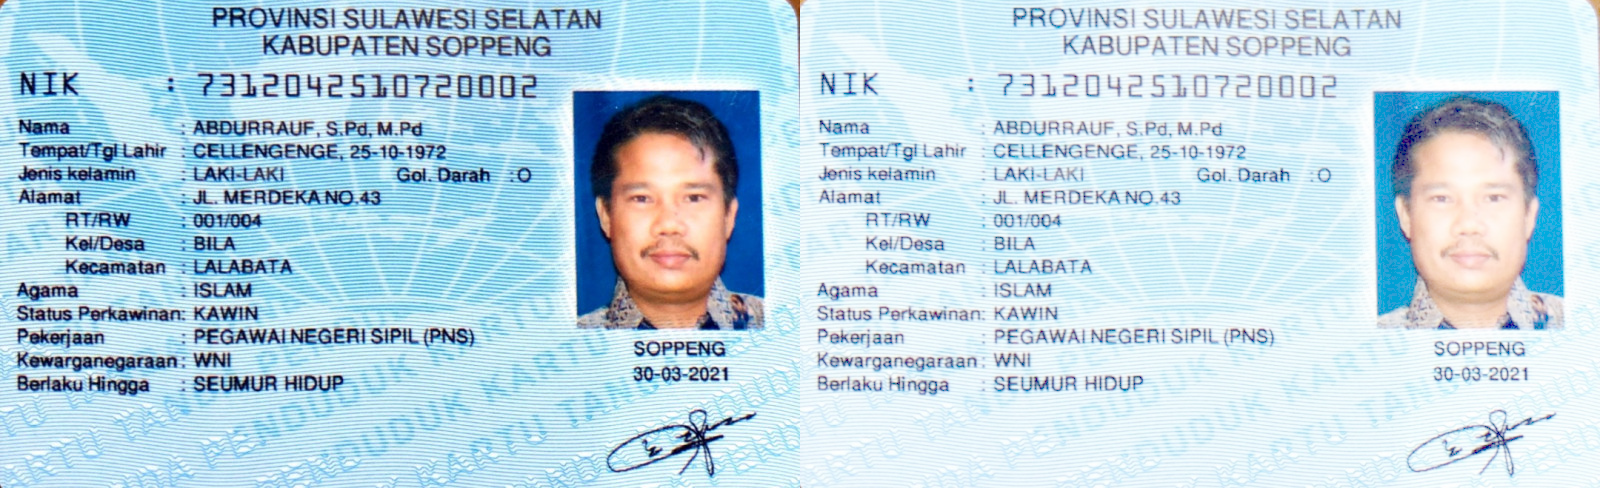

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth.

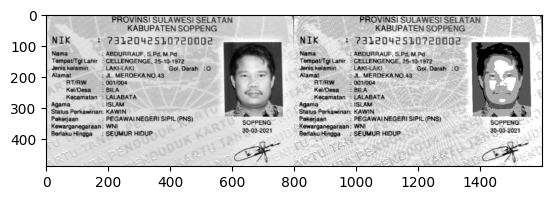

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/KTP.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
plt.imshow(final_frame, cmap='gray')

3. Buat modul Average Denoising.

Jumlah Citra di Average 5
nilai psnr-nya adalah:  29.114367111438337  dB


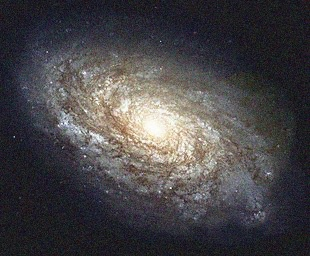


Jumlah Citra di Average 30
nilai psnr-nya adalah:  28.943899312375663  dB


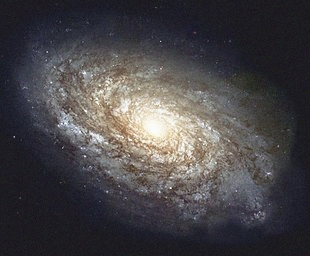


Jumlah Citra di Average 60
nilai psnr-nya adalah:  28.935541535803374  dB


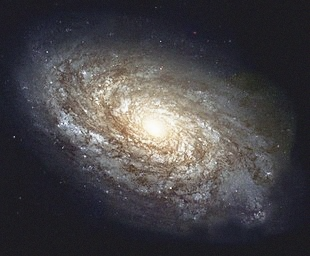


Jumlah Citra di Average 80
nilai psnr-nya adalah:  28.91726336238775  dB


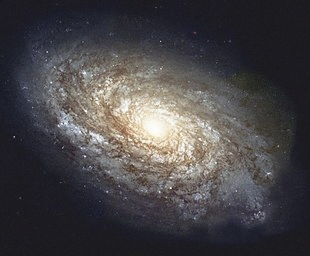


Jumlah Citra di Average 100
nilai psnr-nya adalah:  28.91734513032903  dB


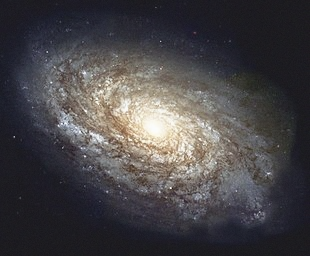

In [14]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
      return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

denoised_image1 = np.mean(cv_img[:5], axis=0).astype(np.uint8)
denoised_image2 = np.mean(cv_img[:30], axis=0).astype(np.uint8)
denoised_image3 = np.mean(cv_img[:60], axis=0).astype(np.uint8)
denoised_image4 = np.mean(cv_img[:80], axis=0).astype(np.uint8)
denoised_image5 = np.mean(cv_img[:100], axis=0).astype(np.uint8)

print('Jumlah Citra di Average 5')
print('nilai psnr-nya adalah: ', PSNR(cv_img[0], denoised_image1), ' dB')
cv2_imshow(denoised_image1)

print('\nJumlah Citra di Average 30')
print('nilai psnr-nya adalah: ', PSNR(cv_img[0], denoised_image2), ' dB')
cv2_imshow(denoised_image2)

print('\nJumlah Citra di Average 60')
print('nilai psnr-nya adalah: ', PSNR(cv_img[0], denoised_image3), ' dB')
cv2_imshow(denoised_image3)

print('\nJumlah Citra di Average 80')
print('nilai psnr-nya adalah: ', PSNR(cv_img[0], denoised_image4), ' dB')
cv2_imshow(denoised_image4)

print('\nJumlah Citra di Average 100')
print('nilai psnr-nya adalah: ', PSNR(cv_img[0], denoised_image5), ' dB')
cv2_imshow(denoised_image5)

Kesimpulannya adalah rata-rata hasil PSNR yang dihasilkan untuk setiap citra yang dilakukan Average Denoising tidak jauh berbeda yaitu di angka 28-29.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff).

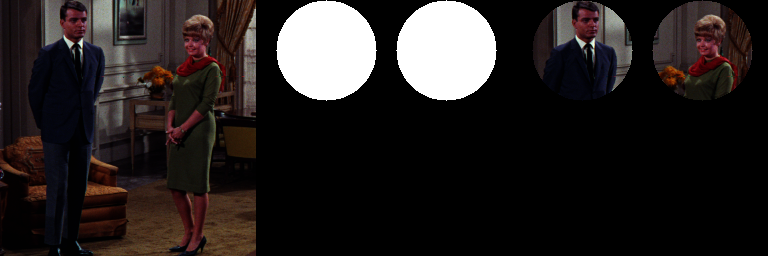

In [6]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
result = cv.bitwise_and(img, mask)
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain.

Operator or


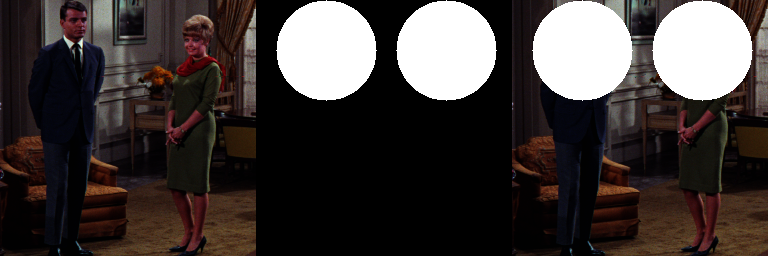


Operator not


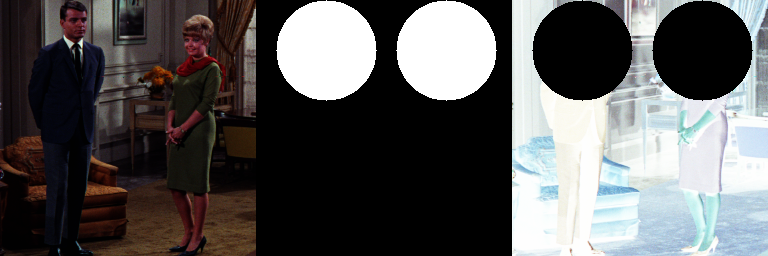


Operator nand


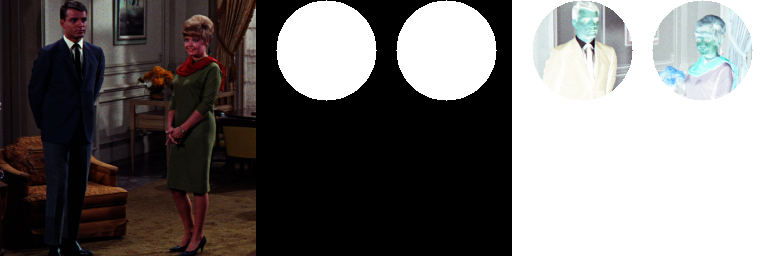


Operator xor


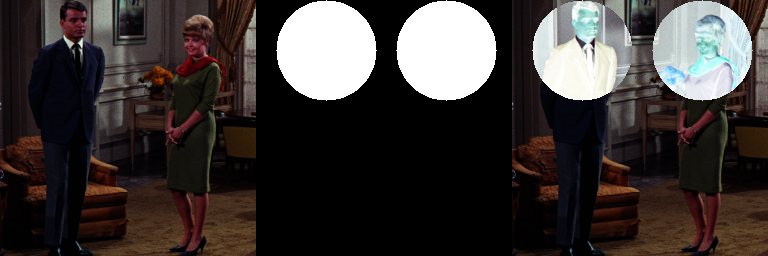

In [10]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
# fungsi dari opencv berikut juga bisa digunakan
result1 = cv.bitwise_or(img, mask)
result2 = ~img & ~mask
result3 = cv.bitwise_not(cv.bitwise_and(img, mask))
result4 = cv.bitwise_xor(img, mask)

# result[mask==0] = 255

print('Operator or')
final_frame1 = cv.hconcat((img, mask, result1))
cv2_imshow(final_frame1)

print('\nOperator not')
final_frame2 = cv.hconcat((img, mask, result2))
cv2_imshow(final_frame2)

print('\nOperator nand')
final_frame3 = cv.hconcat((img, mask, result3))
cv2_imshow(final_frame3)

print('\nOperator xor')
final_frame4 = cv.hconcat((img, mask, result4))
cv2_imshow(final_frame4)

* OR: menghasilkan hasil dari menggabungkan citra img dan mask.
* NOT: menghasilkan hasil dari gabungan kedua citra yang sudah dinegasi.
* NAND: menghasilkan gabungan kedua citra dan membalikkan hasil dari operasi AND.
* XOR: menggabungkan kedua citra namun hasil dari gabungannya dinegasi.